In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate the trajectory
def Etraj(x0, v0, m, q, dt, n, EF):
    """
        x0 : (Array) Initial position vector (x, y, z)
        v0 : (Array) Initial velocity vector (vx, vy, vz)
        m :  (float) Mass of the particle.
        q :  (float) Charge of the particle
        dt : (float) Time
        n :  (int)   Number of time steps.
        EF : (function) Electric field 
    """
    X = [np.array(x0)]
    V = [np.array(v0)]
    x = np.array(x0)
    v = np.array(v0)

    for _ in range(1, n): # loop over n time steps
        xprev = x.copy()
        x = x + v * dt + (1 / (2 * m)) * q * EF(x) * dt**2 # update position using current velocity and acceleration
        v = v + (1 / (2 * m)) * q * (EF(xprev) + EF(x)) * dt # update velocity using average of electric field
        X.append(x)
        V.append(v)
    
    return X, V

In [2]:
def EF_point_charge(x, Q=-1, k=1):  # Example for a single point charge
    r = np.linalg.norm(x)
    if r == 0:
        return np.array([0, 0, 0]) 
    return k * Q * np.array(x) / r**3

In [13]:
def EF_two_charges(x, Q=-1, pos1=np.array([0.5, 0, 0]), pos2=np.array([-0.5, 0, 0]), k=1):
    r1 = np.linalg.norm(x - pos1)  # Distance from the first charge
    r2 = np.linalg.norm(x - pos2)  # Distance from the second charge

    # Contribution from first charge
    if r1 != 0:
        e1 = (k * Q * (x - pos1) / r1**3)
    else:
        e1 = np.array([0, 0, 0])  
    
    # Contribution from second charge
    if r2 != 0:
        e2 = (k * Q * (x - pos2) / r2**3)
    else:
        e2 = np.array([0, 0, 0])  

    # Total electric field 
    return e1 + e2


In [14]:
# Plotting function in 3D
def ShowTrajectory(X, title):
    X = np.array(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X[:, 0], X[:, 1], X[:, 2])
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z')
    plt.title(title)
    plt.show()

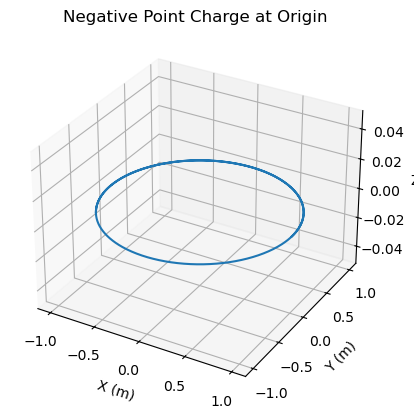

In [15]:
# Part A
x0 = [1, 0, 0]  
v0 = [0, 1, 0] 
m = 1          
q = 1           
dt = 0.01       
n = 1000      
X, V = Etraj(x0, v0, m, q, dt, n, EF=lambda x: EF_point_charge(x, Q=-1))
ShowTrajectory(X, "Negative Point Charge at Origin")

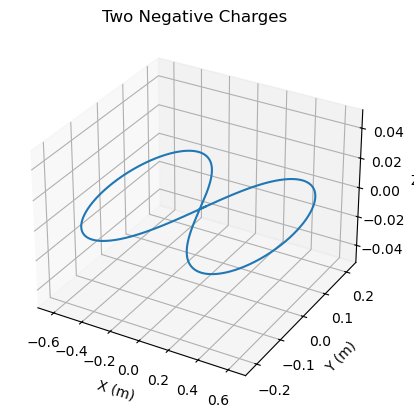

In [16]:
# Part C
x0 = [0, 0, 0]  
v0 = [1.02, 1.10, 0]  
dt = 1 / 20000  
n = 32000       
X, V = Etraj(x0, v0, m, q, dt, n, EF=lambda x: EF_two_charges(x, Q=-1))
ShowTrajectory(X, "Two Negative Charges")